In [1]:
import keras
from keras import models, layers
from keras import datasets
from keras.utils import np_utils # one hot encdoing -- torch.max 부분 대체
import numpy as np

Using TensorFlow backend.
C:\kjy\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\kjy\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\kjy\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\kjy\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (ty

In [2]:
# 1. Data Loading
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

In [3]:
X_train.shape
# y_train.shape

(60000, 28, 28)

In [4]:
# 2-1. preprocessing : flatten
L,W,H = X_train.shape

X_train=X_train.reshape(-1, W * H) # flatten to 1D
X_test=X_test.reshape(-1, W*H)

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [5]:
# 2-2. preprocessing : scaling
X_train=X_train/255
X_test=X_test/255

X_train[0][0:5]

array([0., 0., 0., 0., 0.])

In [6]:
# 3. y 입력 데이터 전처리
'''
output에서는 총 10개의 카테고리가 있다
각각의 노드에서 이미지 에 해당하는 예측값을 0~1사이의 확률분포로
이를 One Hot Encoding
범위에서 해당하는 하나만 1 나머지 0 
np_utils.to_categorical()
'''
print(y_train[30])
print(y_train[9])
print('*'*30)
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
print(Y_train[30])
print(Y_train[9])

3
4
******************************
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [7]:
# 4. Hyperparameter setting
input_size = 28*28
hidden_size = 100
num_classes = 10
epochs = 10
batch_size = 100

In [8]:
# 5. model 생성
model = models.Sequential()
model.add(layers.Dense(hidden_size, activation='relu', input_shape = (input_size,)))# fc1 : out --> in 순서로
model.add(layers.Dense(num_classes, activation='softmax')) # fc2


In [9]:
# 6. compile : loss, optimizer
model.compile('sgd','categorical_crossentropy', metrics=['accuracy'])

In [10]:
# 7. 학습
model.fit(X_train,Y_train, epochs=epochs, batch_size = batch_size, validation_split= 0.2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s 28us/step - loss: 1.1742 - accuracy: 0.7066 - val_loss: 0.6335 - val_accuracy: 0.8540
Epoch 2/10
48000/48000 [==============================] - 1s 26us/step - loss: 0.5579 - accuracy: 0.8608 - val_loss: 0.4515 - val_accuracy: 0.8838
Epoch 3/10
48000/48000 [==============================] - 1s 26us/step - loss: 0.4454 - accuracy: 0.8820 - val_loss: 0.3871 - val_accuracy: 0.8959
Epoch 4/10
48000/48000 [==============================] - 1s 30us/step - loss: 0.3952 - accuracy: 0.8916 - val_loss: 0.3536 - val_accuracy: 0.9032
Epoch 5/10
48000/48000 [==============================] - 1s 24us/step - loss: 0.3653 - accuracy: 0.8990 - val_loss: 0.3336 - val_accuracy: 0.9064
Epoch 6/10
48000/48000 [==============================] - 1s 25us/step - loss: 0.3448 - accuracy: 0.9037 - val_loss: 0.3162 - val_accuracy: 0.9116
Epoch 7/10
48000/48000 [==============================] - 1s 23us/s

In [11]:
# 8. Evaluation
model_perfomance = model.evaluate(X_test, Y_test, batch_size = batch_size)
model_perfomance

10000/10000 [==============================] - 0s 13us/step


[0.2784833820536733, 0.9223999977111816]

In [23]:
# 9. 시각화
# fit 트레이닝할 때 로그 메세지들을 다 모아서 리턴 == history
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.legend(['training', 'validation'])

def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model acc')
    plt.legend(['training', 'validation'])





In [ ]:
history = model.fit(X_train,Y_train, epochs=50, batch_size = batch_size, validation_split= 0.2)

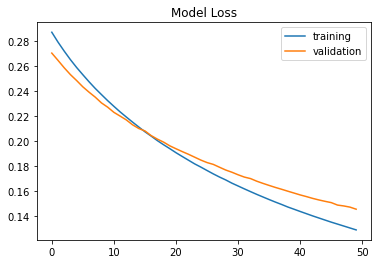

In [24]:
plot_loss(history)



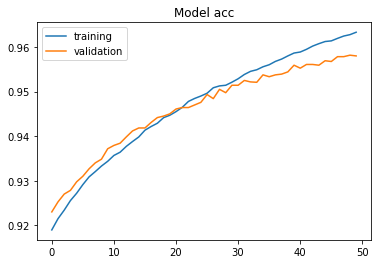

In [25]:
plot_acc(history)